<h1> Test Technique Alternance Data Scientist </h1>

<h2> Randy TCHUISSEU </h2>

<h3> Importations et Traitement des données</h3>

Imports

In [15]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# Fonctions
from os import getcwd, chdir, listdir

In [2]:
# données
#path_data = 'sample_data'
conso22 = pd.read_csv('pdl_2.csv',encoding='utf-8-sig', sep = ',')
conso23 = pd.read_csv('pdl_1.csv',encoding='utf-8-sig', sep = ',')
conso22.shape[0]

35040

Prétraitement des données

In [3]:
conso23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  105120 non-null  object 
 1   value      105120 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [4]:
conso22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  35040 non-null  object 
 1   value      35040 non-null  float64
dtypes: float64(1), object(1)
memory usage: 547.6+ KB


In [16]:
def preprocess(data:pd.DataFrame):
    data['time'] = pd.to_datetime(data['timestamp'],errors= 'coerce', format='%Y-%m-%d %H:%M:%S%z',utc =True) \
        + timedelta(hours=1)
    data['month'] = data['time'].dt.strftime('%m')
    data['day'] = data['time'].dt.strftime('%Y-%m-%d')
    data['value'] = data['value'].astype(float)

In [17]:
preprocess(conso22)
preprocess(conso23)

In [18]:
conso22.head()

,timestamp,value,time,month,day
0,2022-01-01 00:00:00+01:00,3.733333,2022-01-01 00:00:00+00:00,01,2022-01-01
1,2022-01-01 00:30:00+01:00,4.000000,2022-01-01 00:30:00+00:00,01,2022-01-01
2,2022-01-01 01:00:00+01:00,3.733333,2022-01-01 01:00:00+00:00,01,2022-01-01
3,2022-01-01 01:30:00+01:00,4.000000,2022-01-01 01:30:00+00:00,01,2022-01-01
4,2022-01-01 02:00:00+01:00,3.733333,2022-01-01 02:00:00+00:00,01,2022-01-01


<h3>1.	Comparaison de la consommation mensuelle de 2023 vs 2022 </h3>

In [24]:
df22 = conso22.drop('timestamp', axis = 1).groupby(['day', 'month'], as_index = False).mean('value')
df23 = conso23.drop('timestamp', axis = 1).groupby(['day', 'month'], as_index = False).mean('value')

In [37]:
# Fusionner les valeurs de 2023 et de 2022 dans une seule table pour les manipuler plus facilement
df = pd.merge(df22.rename(columns = {'value':'value22'}),df23.rename(columns = {'value':'value23'}), on = ['day', 'month'], how = 'inner')


In [40]:
#  Les colonnes sont donc bien différentes
len(df[df['value22']-df['value23'] !=0])
#df.info()

283

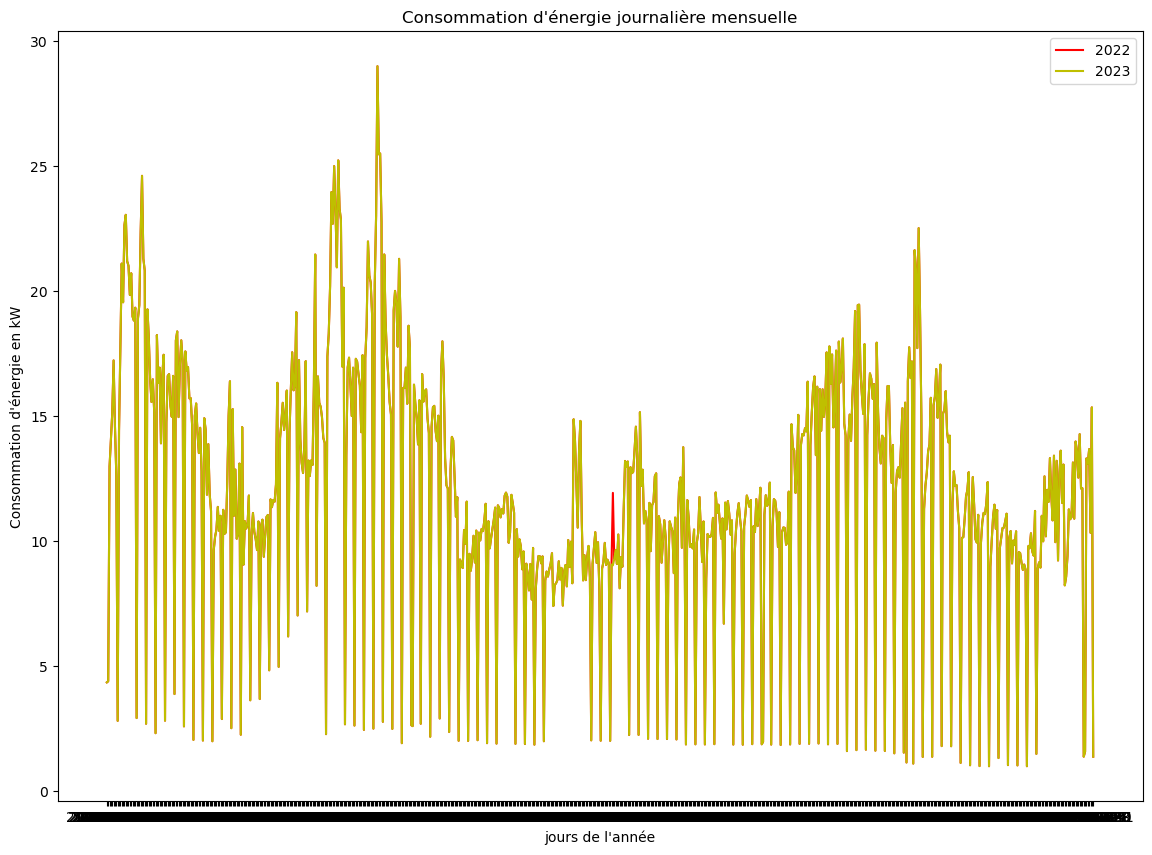

In [60]:
# consommation journalière
plt.figure(figsize=(14,10))
plt.plot(df['day'], df['value22'],'r-',label = '2022')
plt.plot(df['day'], df['value23'],'y-',label = '2023')
plt.title('Consommation d\'énergie journalière mensuelle')
plt.xlabel('jours de l\'année')
plt.ylabel('Consommation d\'énergie en kW')
plt.legend()
plt.show()

In [53]:
# df_month23 = df.groupby('month',as_index = False)['value23'].mean()
# df_month22 = df.groupby('month',as_index = False)['value22'].mean()
# df_month = pd.merge(df_month22, df_month23, on= 'month', how = 'inner')
df_month = df.groupby('month',as_index = False)[['value22', 'value23']].mean()

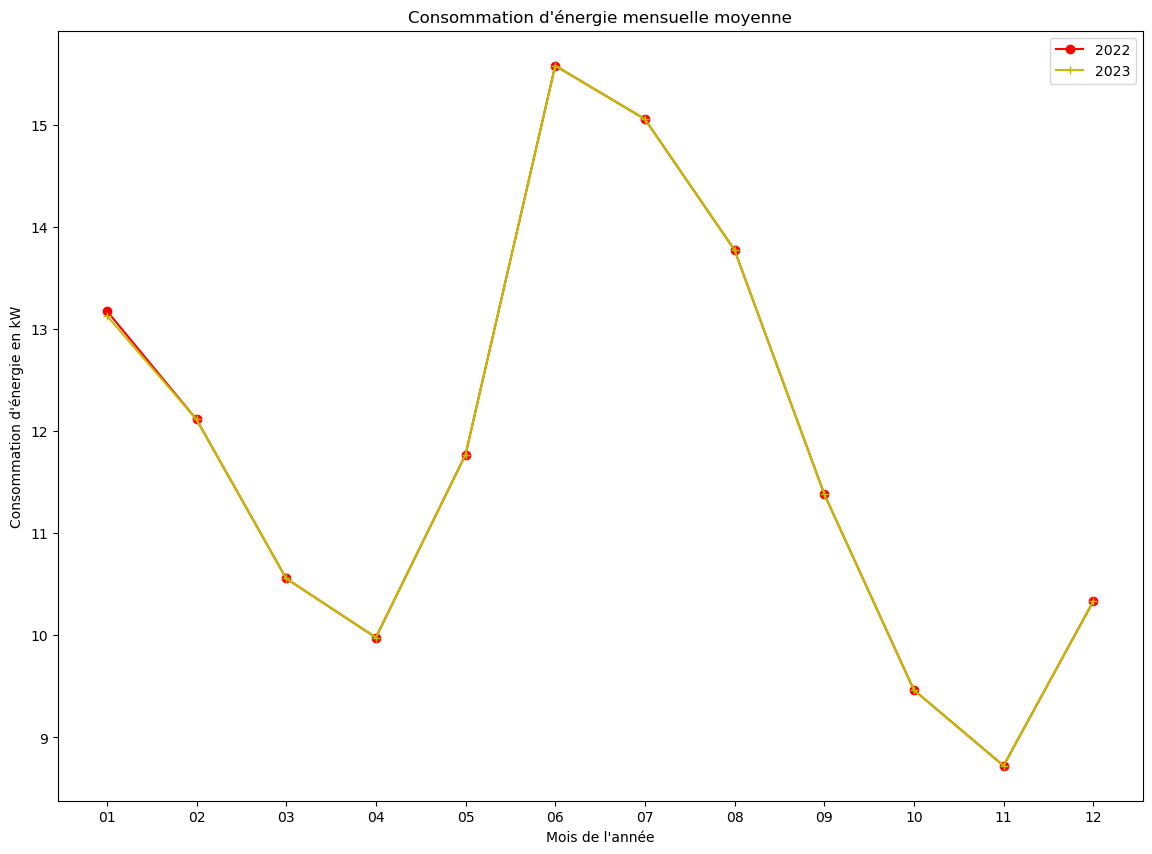

In [61]:
# consommation moyenne mensuelle
plt.figure(figsize=(14,10))
plt.plot(df_month['month'], df_month['value22'],'ro-', label='2022')
plt.plot(df_month['month'], df_month['value23'],'y+-', label='2023')
plt.title('Consommation d\'énergie mensuelle moyenne')
plt.xlabel('Mois de l\'année')
plt.ylabel('Consommation d\'énergie en kW')
plt.legend()
plt.show()

 <h3> 2.	Analyse de l'évolution des consommations de nuit sur le mois de janvier 2023. Une nuit est composée des consommations du jour J de 22h à 00h et des consommations du jour J+1 de 00h à 06h. </h3>